Dataset loaded successfully.

--- Data Preprocessing and Cleaning ---
Unique values in 'Gender' before cleaning: ['M' 'F' 'NC']
Unique values in 'Gender' after cleaning: ['M' 'F']

Final Data Information after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 9206
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2512 non-null   datetime64[ns]
 1   Gender               2512 non-null   object        
 2   Age                  2512 non-null   int64         
 3   Satisfaction Score   2512 non-null   float64       
 4   Race                 2512 non-null   object        
 5   Patient Admin Flag   2512 non-null   bool          
 6   Wait Time            2512 non-null   int64         
 7   Department Referral  1075 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 159.5+ KB

First 5 rows of 

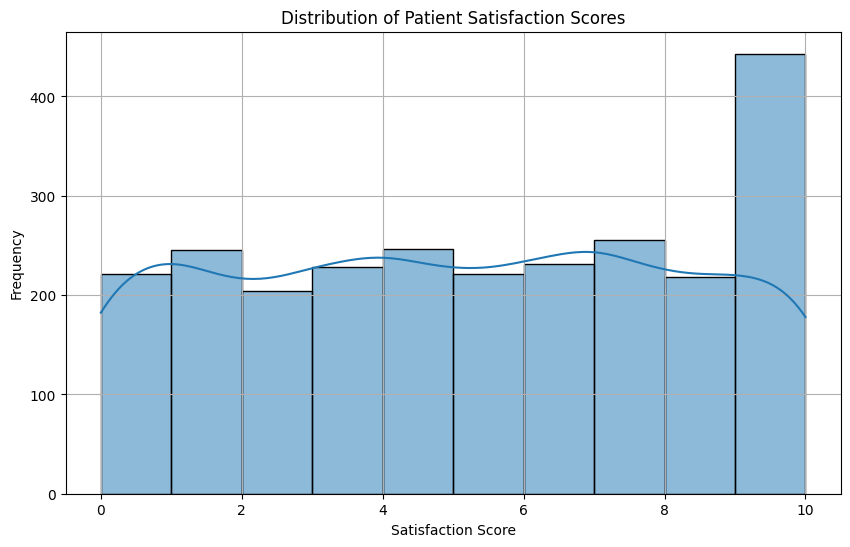

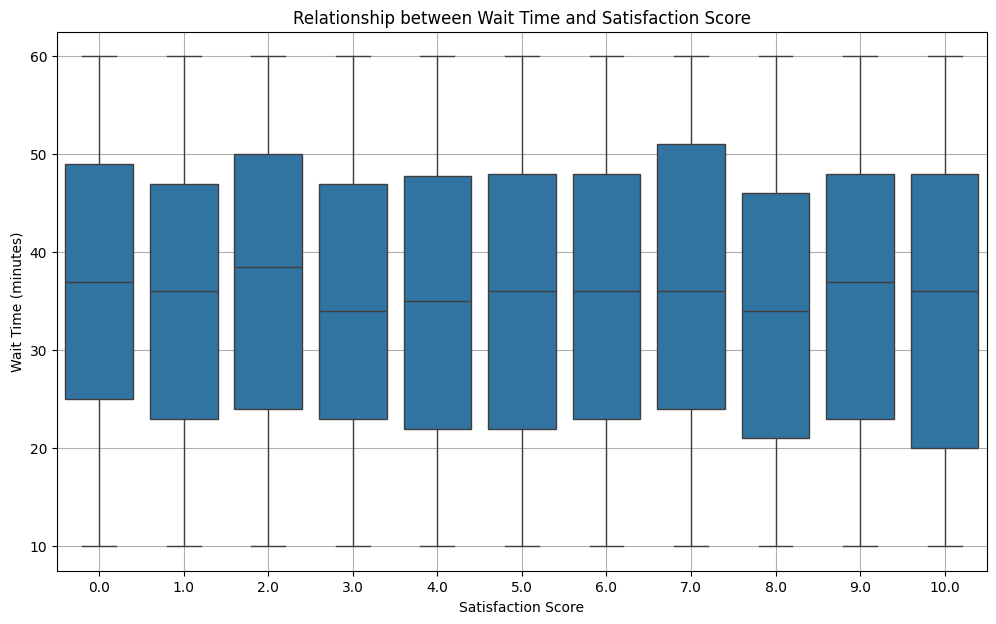


--- Feature Engineering ---

--- Basic Modeling ---
Model Performance:
Mean Absolute Error (MAE): 2.60
Mean Squared Error (MSE): 9.11
R-squared: -0.01

Enhanced dataset with new features:
| Date                | Age   | Wait Time   | Satisfaction Score   | hour   | day_of_week   | is_weekend   | time_of_day   |
|:--------------------|:------|:------------|:---------------------|:-------|:--------------|:-------------|:--------------|
| 2020-06-20 09:13:00 | 56    | 55          | 9                    | 9      | Saturday      | 1            | Morning_Peak  |
| 2020-02-04 22:34:00 | 24    | 31          | 8                    | 22     | Tuesday       | 0            | Night_OffPeak |
| 2020-08-05 01:33:00 | 74    | 20          | 0                    | 1      | Wednesday     | 0            | Night_OffPeak |
| 2020-10-24 04:53:00 | 74    | 48          | 9                    | 4      | Saturday      | 1            | Night_OffPeak |
| 2019-09-23 23:51:00 | 14    | 23          | 4              

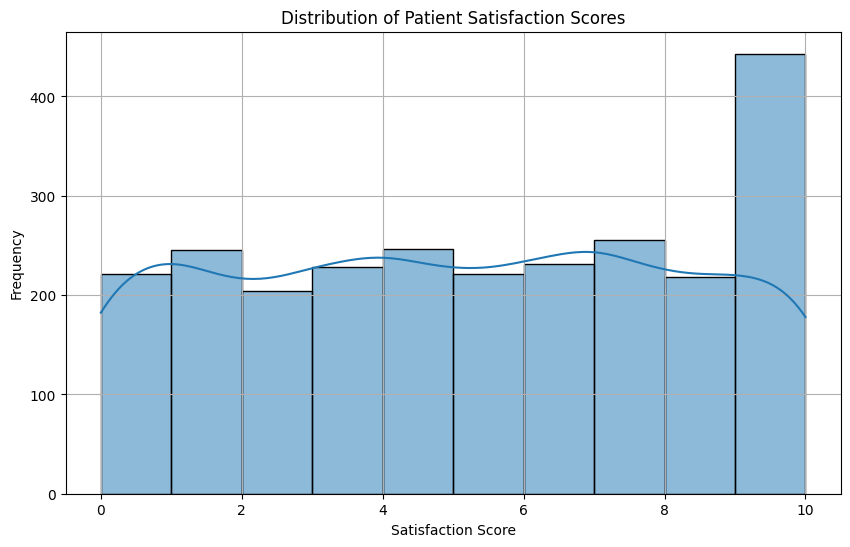

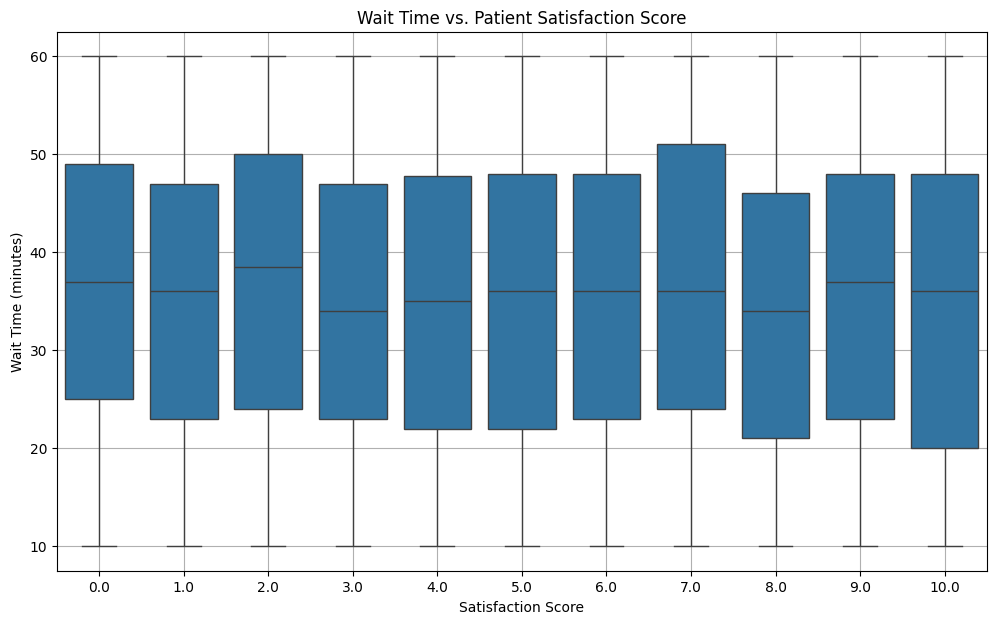

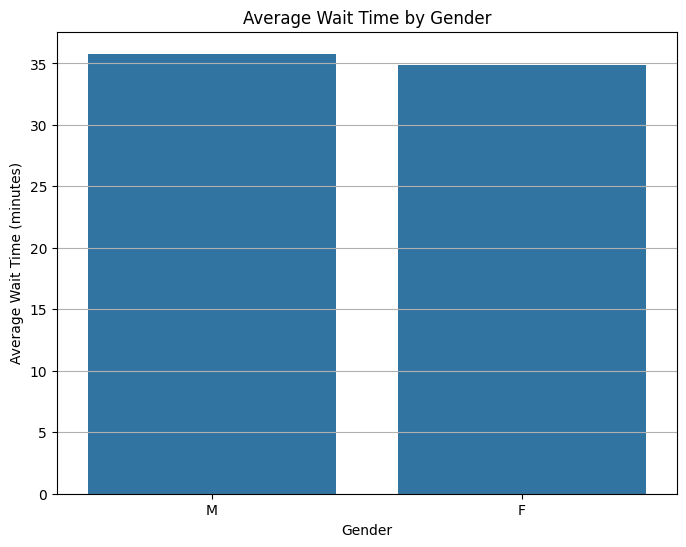


Exploratory Data Analysis complete. Check the generated image files for visualizations.


In [2]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv("patient_v.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please upload the correct CSV file and try again.")
    exit()

print("\n--- Data Preprocessing and Cleaning ---")
# Drop unnecessary columns
df_cleaned = df.drop(columns=['Patient ID', 'First Name', 'Last Name'])

# Convert 'Date' to datetime objects and handle potential conversion errors
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d/%m/%Y %H:%M', errors='coerce')
df_cleaned.dropna(subset=['Date'], inplace=True)

# Handle inconsistencies in 'Gender'
print(f"Unique values in 'Gender' before cleaning: {df_cleaned['Gender'].unique()}")
df_cleaned['Gender'] = df_cleaned['Gender'].replace('NC', pd.NA)
df_cleaned.dropna(subset=['Gender'], inplace=True)
print(f"Unique values in 'Gender' after cleaning: {df_cleaned['Gender'].unique()}")

# Handle missing 'Satisfaction Score' values by dropping rows
df_cleaned.dropna(subset=['Satisfaction Score'], inplace=True)

# Replace 'None' in 'Department Referral' with NaN for consistency
df_cleaned['Department Referral'] = df_cleaned['Department Referral'].replace('None', pd.NA)

# Check for final missing values and data types
print("\nFinal Data Information after cleaning:")
df_cleaned.info()

# Display the first 5 rows of the prepared dataset
print("\nFirst 5 rows of the prepared dataset:")
print(df_cleaned.head().to_markdown(index=False, numalign="left", stralign="left"))

# Save the prepared data to a new CSV file
df_cleaned.to_csv("patient_data_cleaned.csv", index=False)

import pandas as pd

# Load the dataset
try:
    df = pd.read_csv("patient_v.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please upload the correct CSV file and try again.")
    exit()

# Display initial information about the dataset
print("\n--- Initial Data Information ---")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
df.info()


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("patient_v.csv")

print("--- Data Preprocessing and Cleaning ---")
# Drop unnecessary columns
df_cleaned = df.drop(columns=['Patient ID', 'First Name', 'Last Name'])

# Convert 'Date' to datetime objects and handle potential conversion errors
# Assuming the format is 'dd/mm/yyyy hh:mm'
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d/%m/%Y %H:%M', errors='coerce')

# Drop rows where 'Date' conversion failed
df_cleaned.dropna(subset=['Date'], inplace=True)

# Handle inconsistencies in 'Gender'
# Check for unique values
print(f"\nUnique values in 'Gender' before cleaning: {df_cleaned['Gender'].unique()}")
# Replace 'NC' with NaN, then drop the rows
df_cleaned['Gender'] = df_cleaned['Gender'].replace('NC', pd.NA)
df_cleaned.dropna(subset=['Gender'], inplace=True)
print(f"Unique values in 'Gender' after cleaning: {df_cleaned['Gender'].unique()}")

# Handle missing 'Satisfaction Score' values by dropping rows for modeling
df_cleaned.dropna(subset=['Satisfaction Score'], inplace=True)

# Replace 'None' in 'Department Referral' with NaN
df_cleaned['Department Referral'] = df_cleaned['Department Referral'].replace('None', pd.NA)

# Check for final missing values and data types
print("\nFinal Data Information after cleaning:")
df_cleaned.info()

# --- Exploratory Data Analysis (EDA) ---
print("\n--- Exploratory Data Analysis ---")
# Descriptive statistics
print("\nDescriptive statistics for numerical columns:")
print(df_cleaned[['Age', 'Wait Time', 'Satisfaction Score']].describe().to_markdown())

# Visualization 1: Distribution of Satisfaction Score
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Satisfaction Score'], kde=True, bins=10)
plt.title('Distribution of Patient Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('satisfaction_score_distribution.png')
plt.show()

# Visualization 2: Relationship between Wait Time and Satisfaction Score
plt.figure(figsize=(12, 7))
sns.boxplot(x='Satisfaction Score', y='Wait Time', data=df_cleaned)
plt.title('Relationship between Wait Time and Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Wait Time (minutes)')
plt.grid(True)
plt.savefig('wait_time_vs_satisfaction.png')
plt.show()

# --- Feature Engineering ---
print("\n--- Feature Engineering ---")
df_cleaned['hour'] = df_cleaned['Date'].dt.hour
df_cleaned['day_of_week'] = df_cleaned['Date'].dt.day_name()
df_cleaned['is_weekend'] = df_cleaned['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

def get_time_of_day(hour):
    if 6 <= hour < 10:
        return 'Morning_Peak'
    elif 16 <= hour < 20:
        return 'Evening_Peak'
    elif 10 <= hour < 16:
        return 'Daytime_OffPeak'
    else:
        return 'Night_OffPeak'

df_cleaned['time_of_day'] = df_cleaned['hour'].apply(get_time_of_day)

# --- Basic Modeling: Predicting Satisfaction Score ---
print("\n--- Basic Modeling ---")

# Define features (X) and target (y)
features = ['Age', 'Wait Time', 'Gender', 'Race', 'Patient Admin Flag', 'Department Referral', 'hour', 'is_weekend', 'time_of_day']
target = 'Satisfaction Score'

# Drop rows with NaN in features
df_model = df_cleaned.dropna(subset=features).copy()
X = df_model[features]
y = df_model[target]

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['Gender', 'Race', 'Department Referral', 'time_of_day'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Display the final head of the enhanced dataset
print("\nEnhanced dataset with new features:")
print(df_model[['Date', 'Age', 'Wait Time', 'Satisfaction Score', 'hour', 'day_of_week', 'is_weekend', 'time_of_day']].head().to_markdown(index=False, numalign="left", stralign="left"))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared dataset
try:
    df = pd.read_csv("patient_data_cleaned.csv")
    print("Cleaned dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please ensure 'patient_data_cleaned.csv' is in the current directory.")
    exit()

# Display descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
print(df[['Age', 'Wait Time', 'Satisfaction Score']].describe().to_markdown())

# EDA Visualization 1: Distribution of Satisfaction Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Satisfaction Score'], kde=True, bins=10)
plt.title('Distribution of Patient Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('satisfaction_score_distribution.png')
plt.show()

# EDA Visualization 2: Relationship between Wait Time and Satisfaction Score
plt.figure(figsize=(12, 7))
sns.boxplot(x='Satisfaction Score', y='Wait Time', data=df)
plt.title('Wait Time vs. Patient Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Wait Time (minutes)')
plt.grid(True)
plt.savefig('wait_time_vs_satisfaction.png')
plt.show()

# EDA Visualization 3: Average Wait Time by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Wait Time', data=df, errorbar=None)
plt.title('Average Wait Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Wait Time (minutes)')
plt.grid(axis='y')
plt.savefig('avg_wait_time_by_gender.png')
plt.show()

print("\nExploratory Data Analysis complete. Check the generated image files for visualizations.")